### Import the libraries

In [1]:
import warnings
warnings.simplefilter('ignore')

### Import data handling libraries

In [2]:
import pandas as pd
import numpy as np

### Import data visualization libraries

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Import the dataset

In [4]:
df = pd.read_csv('C:/Users/dmani/Downloads/tic-tac-toe.csv')

In [5]:
df

,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
0,x,x,x,x,o,o,x,o,o,True
1,x,x,x,x,o,o,o,x,o,True
2,x,x,x,x,o,o,o,o,x,True
3,x,x,x,x,o,o,o,b,b,True
4,x,x,x,x,o,o,b,o,b,True
...,...,...,...,...,...,...,...,...,...,...
953,o,x,x,x,o,o,o,x,x,False
954,o,x,o,x,x,o,x,o,x,False
955,o,x,o,x,o,x,x,o,x,False
956,o,x,o,o,x,x,x,o,x,False


### Understanding the dataset

The first 9 columns denote the 9 board positions in a tic tac toe game. 

X always begins the game.

The column 'class' conatins boolean values denoting the victory (True) or loss (False) of X

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   TL      958 non-null    object
 1   TM      958 non-null    object
 2   TR      958 non-null    object
 3   ML      958 non-null    object
 4   MM      958 non-null    object
 5   MR      958 non-null    object
 6   BL      958 non-null    object
 7   BM      958 non-null    object
 8   BR      958 non-null    object
 9   class   958 non-null    bool  
dtypes: bool(1), object(9)
memory usage: 68.4+ KB


In [7]:
df.describe()

,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
count,958,958,958,958,958,958,958,958,958,958
unique,3,3,3,3,3,3,3,3,3,2
top,x,x,x,x,x,x,x,x,x,True
freq,418,378,418,378,458,378,418,378,418,626


In [8]:
df.isnull().sum()

TL       0
TM       0
TR       0
ML       0
MM       0
MR       0
BL       0
BM       0
BR       0
class    0
dtype: int64

In [9]:
df.shape

(958, 10)

In [10]:
df['class'].unique()

array([ True, False])

In [11]:
df.groupby('class').size()

class
False    332
True     626
dtype: int64

### Winner Visualization

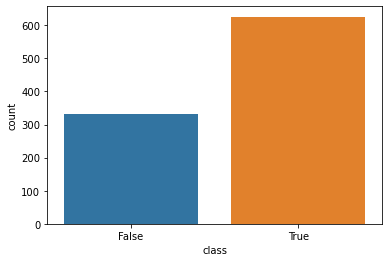

In [12]:
sns.countplot(df['class'],label = 'count')
plt.show()

### Segregate the dataset

In [13]:
x = df.drop(['class'],axis = 1)

In [14]:
x.shape

(958, 9)

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
k = x.columns
for i in k:
    le = LabelEncoder()
    x[i] = le.fit_transform(x[i])

In [17]:
x

,TL,TM,TR,ML,MM,MR,BL,BM,BR
0,2,2,2,2,1,1,2,1,1
1,2,2,2,2,1,1,1,2,1
2,2,2,2,2,1,1,1,1,2
3,2,2,2,2,1,1,1,0,0
4,2,2,2,2,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...
953,1,2,2,2,1,1,1,2,2
954,1,2,1,2,2,1,2,1,2
955,1,2,1,2,1,2,2,1,2
956,1,2,1,1,2,2,2,1,2


In [18]:
y = df.iloc[:,-1].values.reshape(-1,1)

In [19]:
y.shape

(958, 1)

In [20]:
y

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

### Divide the dataset into training and test set

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25,random_state = 0)

In [23]:
x_train.shape

(718, 9)

In [24]:
x_test.shape

(240, 9)

In [25]:
y_train.shape

(718, 1)

In [26]:
y_test.shape

(240, 1)

### Decision Tree Classifier

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
DC = DecisionTreeClassifier(criterion='entropy')

In [29]:
DC.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Prediction

In [30]:
y_pred = DC.predict(x_test)

In [31]:
y_pred

array([False,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False,  True,  True,  True,  True,  True, False,  True,  True,
        True, False,  True, False, False,  True,  True,  True,  True,
        True, False, False, False,  True,  True,  True,  True,  True,
       False, False, False,  True,  True,  True,  True, False,  True,
       False, False, False, False,  True,  True,  True, False,  True,
       False,  True, False,  True, False,  True,  True, False,  True,
       False,  True, False,  True,  True, False,  True,  True, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True, False, False,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False,  True,  True,  True, False,
       False,  True, False, False,  True,  True, False,  True,  True,
       False,  True,

### Actual vs Predicted

In [32]:
final = pd.DataFrame(y_test,columns = ['Actual'])

In [33]:
final['Predicted'] = y_pred

In [34]:
final=final.astype('str')

In [35]:
final

,Actual,Predicted
0,False,False
1,True,True
2,True,True
3,True,True
4,True,True
...,...,...
235,True,True
236,False,False
237,True,True
238,True,True


In [36]:
final.groupby('Actual').size()

Actual
False     86
True     154
dtype: int64

In [37]:
final.groupby('Predicted').size()

Predicted
False     75
True     165
dtype: int64

### Performance metrics

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [39]:
acc = accuracy_score(y_test, y_pred)

In [40]:
acc

0.9291666666666667

### Confusion matrix

In [41]:
a = confusion_matrix(y_test,y_pred)

In [42]:
a

array([[ 72,  14],
       [  3, 151]], dtype=int64)

In [43]:
mat = pd.DataFrame(a,columns = ['Predicted:No','Predicted:Yes'],index = ['Actual:No','Actual:Yes'])

In [44]:
mat

,Predicted:No,Predicted:Yes
Actual:No,72,14
Actual:Yes,3,151


### Visualize the decision tree 

In [45]:
from sklearn import tree

In [46]:
z = DC.fit(x_train,y_train)

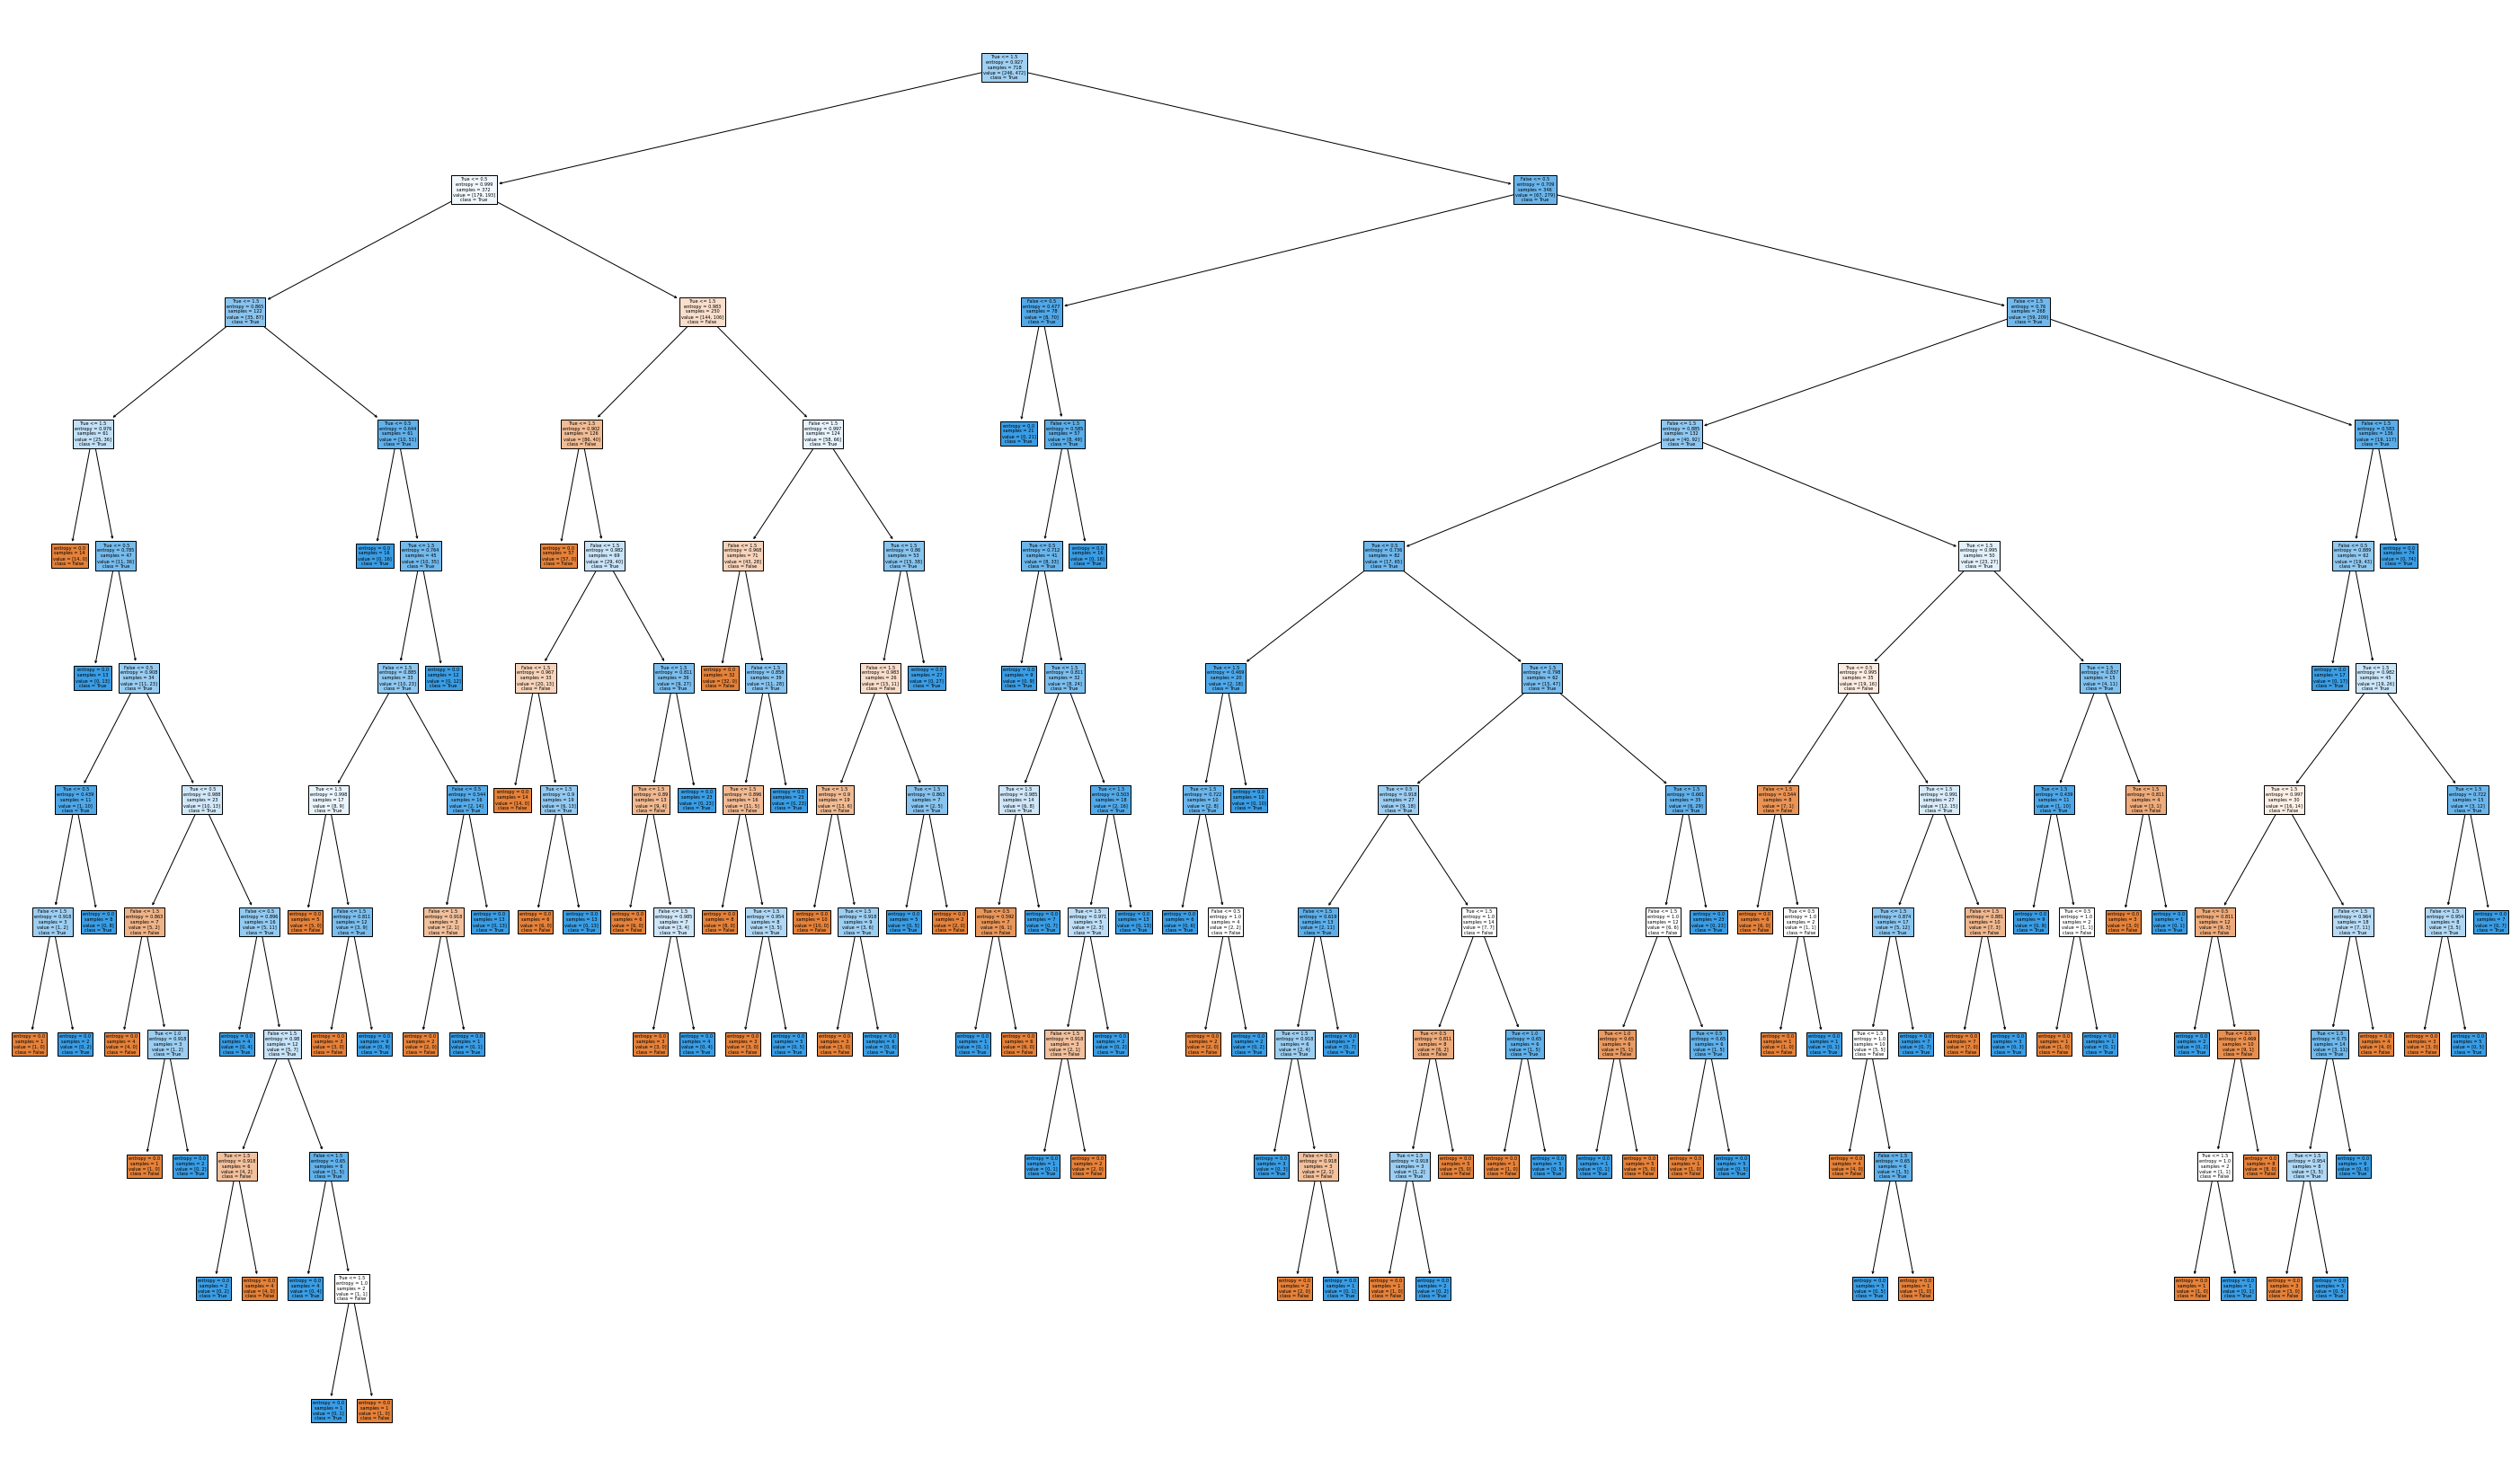

In [47]:
fig = plt.figure(figsize =(50,30))
_ = tree.plot_tree(z,feature_names = final.Actual, class_names = final.Predicted, filled = True)